# Tensorflow Tutorial

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print("Num CPUs Available: ", len(tf.config.experimental.list_physical_devices('CPU')))
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num CPUs Available:  1
Num GPUs Available:  0


## Training Data

In [45]:
# create pseudo data
m = 2
b = 0.5
x = np.linspace(0,4,100)
y = m * x + b + np.random.randn(*x.shape) + 0.25
#print(x)
#print(y)

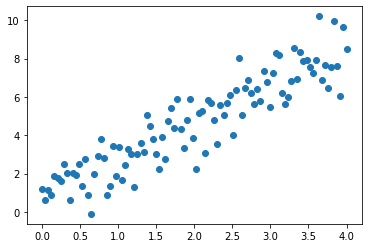

In [46]:
plt.scatter(x,y)

In [59]:
for i in range(10):
    print(np.random.rand())

0.21824487735023723
0.24827624652653835
0.8642254620604921
0.8297285252760238
0.9731247775219517
0.37969310488825403
0.8041643773869277
0.7461763995176681
0.89978183148965
0.8478876245881436


In [68]:
# testing tf.Variable() methods
tmp = tf.Variable(10.0)
print(tmp)
tmp.assign_add(5.0)
print(tmp)
tmp.assign_sub(7.0)
print(tmp)
tmp.assign(20.0)
print(tmp)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=10.0>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=15.0>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=8.0>
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>


In [77]:
vals = np.linspace(0,10,11)
print(vals)
print(np.mean(vals))
print(tf.reduce_mean(vals))
print(tf.square(vals))
print(np.mean(tf.square(vals)))
print(tf.reduce_mean(tf.square(vals)))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
5.0
tf.Tensor(5.0, shape=(), dtype=float64)
tf.Tensor([  0.   1.   4.   9.  16.  25.  36.  49.  64.  81. 100.], shape=(11,), dtype=float64)
35.0
tf.Tensor(35.0, shape=(), dtype=float64)


In [84]:
var = 1
print(f"var: {var}")

var: 1


## Model Class

In [78]:
class Model:
    def __init__(self):
        self.weight = tf.Variable(10.0)
        self.bias   = tf.Variable(10.0)
        
    def __call__(self, x):
        return self.weight * x + self.bias

In [1]:
# We use __call__() so that we can use this function with parentheses, e.g. model()
# For example,
# model = Model()
# model(5.0)

In [80]:
def calculate_loss(y_expected, y_predicted):
    return tf.reduce_mean(tf.square(y_expected - y_predicted))

In [82]:
def train(model, x, y, learning_rate):
    with tf.GradientTape() as gt:
        y_predicted = model(x)
        loss = calculate_loss(y, y_predicted)
    # differentiate the loss with respect to weight and bias
    dw_dl, db_dl = gt.gradient(loss, [model.weight, model.bias])
    # subtract derivative times learning rate from current values
    # the goal is to minimize the loss
    model.weight.assign_sub(learning_rate * dw_dl)
    model.bias.assign_sub(learning_rate * db_dl)

## Train

In [110]:
model = Model()
#epochs = 10
#learning_rate = 0.1
epochs = 100
learning_rate = 0.15

for epoch in range(epochs):
    y_predicted = model(x)
    loss = calculate_loss(y, y_predicted)
    print(f"epoch: {epoch}, loss: {loss.numpy()}, weight: {model.weight.numpy()}, bias: {model.bias.numpy()}")
    train(model, x, y, learning_rate)

epoch: 0, loss: 731.3988037109375, weight: 10.0, bias: 10.0
epoch: 1, loss: 519.4813232421875, weight: -8.494813919067383, bias: 2.400866985321045
epoch: 2, loss: 369.2339172363281, weight: 7.311008453369141, bias: 8.178361892700195
epoch: 3, loss: 262.6863708496094, weight: -5.766707420349121, bias: 2.739114761352539
epoch: 4, loss: 187.10755920410156, weight: 5.449151039123535, bias: 6.7782721519470215
epoch: 5, loss: 133.47811889648438, weight: -3.794492721557617, bias: 2.876166582107544
epoch: 6, loss: 95.40789031982422, weight: 4.1676530838012695, bias: 5.6908793449401855
epoch: 7, loss: 68.36909484863281, weight: -2.362802505493164, bias: 2.8838906288146973
epoch: 8, loss: 49.153316497802734, weight: 3.2924351692199707, bias: 4.837271690368652
epoch: 9, loss: 35.486820220947266, weight: -1.318434715270996, bias: 2.8114960193634033
epoch: 10, loss: 25.758058547973633, weight: 2.7008118629455566, bias: 4.159975051879883
epoch: 11, loss: 18.824668884277344, weight: -0.55230188369750

epoch: 96, loss: 1.0005617141723633, weight: 1.9190661907196045, bias: 0.8329983949661255
epoch: 97, loss: 1.0005600452423096, weight: 1.9192485809326172, bias: 0.8325260877609253
epoch: 98, loss: 1.0005584955215454, weight: 1.9194209575653076, bias: 0.8320860862731934
epoch: 99, loss: 1.0005574226379395, weight: 1.9195802211761475, bias: 0.8316746354103088


In [113]:
print(f"weight: {model.weight.numpy()}")
print(f"bias: {model.bias.numpy()}")

weight: 1.9197301864624023
bias: 0.8312910795211792


In [119]:
new_x = np.linspace(0,4,50)
new_y = model.weight.numpy() * new_x + model.bias.numpy()

In [125]:
print(new_x[0], new_x[-1])
print(new_y[0], new_y[-1])

0.0 4.0
0.8312910795211792 8.510211825370789


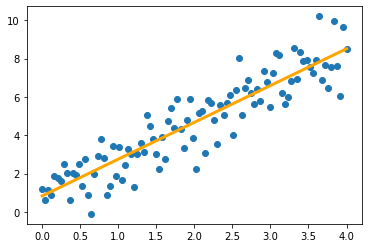

In [136]:
plt.scatter(x,y)
#plt.scatter(new_x,new_y)
plt.plot([new_x[0], new_x[-1]], [new_y[0], new_y[-1]], color='orange', linewidth=3)

In [143]:
for val in range(21):
    print(f"x = {val}, f(x) = {model(val).numpy()}")

x = 0, f(x) = 0.8312910795211792
x = 1, f(x) = 2.751021385192871
x = 2, f(x) = 4.670751571655273
x = 3, f(x) = 6.590481758117676
x = 4, f(x) = 8.510211944580078
x = 5, f(x) = 10.42994213104248
x = 6, f(x) = 12.349672317504883
x = 7, f(x) = 14.269402503967285
x = 8, f(x) = 16.189132690429688
x = 9, f(x) = 18.108863830566406
x = 10, f(x) = 20.028593063354492
x = 11, f(x) = 21.948322296142578
x = 12, f(x) = 23.868053436279297
x = 13, f(x) = 25.787784576416016
x = 14, f(x) = 27.7075138092041
x = 15, f(x) = 29.627243041992188
x = 16, f(x) = 31.546974182128906
x = 17, f(x) = 33.466705322265625
x = 18, f(x) = 35.386436462402344
x = 19, f(x) = 37.3061637878418
x = 20, f(x) = 39.225894927978516
